In [1]:
#Phys 267 final project code
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#for y=mx+b:
def slope(xset, yset):
    n=len(xset)
    m= ((n*sum(xset*yset)-sum(xset)*sum(yset))
        / (n*sum(xset*xset)-sum(xset)**2))
    b= ((sum(xset*xset)*sum(yset)-sum(xset)*sum(xset*yset))
        / (n*sum(xset*xset)-sum(xset)**2))
    return {"m":m,"b":b}
def error_bars(xset,yset):
    n=len(xset)
    sum=0
    m=slope(xset,yset)["m"]
    b=slope(xset,yset)["b"]
    for i in range(n):
        sum+=(yset[i]-(xset[i]*m+b))**2
    return np.sqrt(sum/(n-2))

In [2]:
migraine_data=pd.read_csv(r"C:\Users\nonih\Downloads\Phys267 Data.csv", header=1)
migraine_score=migraine_data["migraine score"]
sleep=migraine_data["Hours of Sleep"]
steps=migraine_data["Steps"]
water=migraine_data["Water Intake (L)"]

{'m': -0.08594685715882315, 'b': 13.18173948272811}


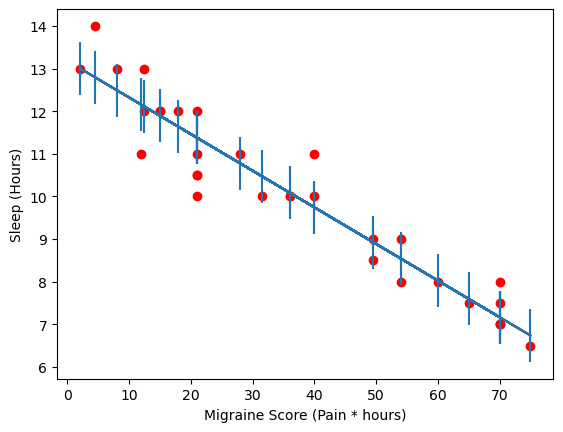

In [3]:
#Figure 1
plt.scatter(migraine_score,sleep,color="r")
plt.plot(migraine_score,slope(migraine_score,sleep)["m"]*migraine_score
         +slope(migraine_score,sleep)["b"], "r-", label="")
plt.errorbar(migraine_score,slope(migraine_score,sleep)["m"]*migraine_score
         +slope(migraine_score,sleep)["b"], yerr=error_bars(migraine_score,sleep))
#plt.title("Impact of Sleep on Migraines")
plt.xlabel("Migraine Score (Pain * hours)")
plt.ylabel("Sleep (Hours)")
plt.savefig("Fig 1.png")
print(slope(migraine_score,sleep))
plt.show()


In [12]:
#Since the results for this one were linear, we need the uncertainty in f(0).
def uncertainty(xset,yset):
    sigma_y=error_bars(xset,yset)
    n=len(xset)
    x1=sum(xset**2)/n
    x2=sum(xset)/n
    sigma_m=np.sqrt(sigma_y**2/(n*(x1-x2**2)))
    sigma_b=np.sqrt(sigma_y**2*x1/(n*(x1-x2**2)))
    Cov_mb=-sigma_y**2*x2/(n*(x1-x2**2))
    m=slope(xset,yset)["m"]
    b=slope(xset,yset)["b"]
    return np.sqrt((sigma_b**2* (-1/m)**2)
                   +sigma_m**2*(b/(m**2))**2
                   +2*Cov_mb*(-b)/(m**3))
print(uncertainty(migraine_score, sleep))

6.626913529891262


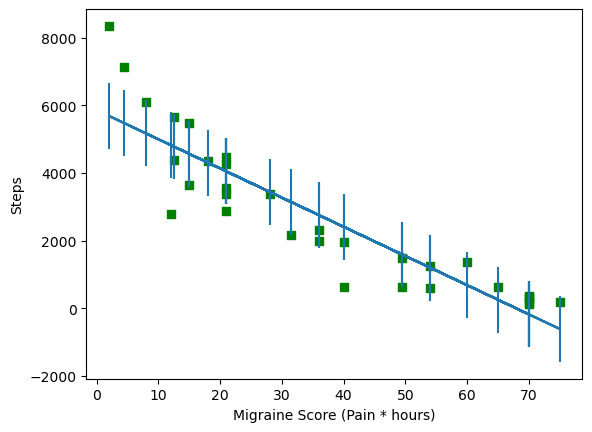

{'m': -86.30864758640601, 'b': 5864.032613089195}


<Figure size 640x480 with 0 Axes>

In [4]:
#Figure 2
plt.scatter(migraine_score, steps, color="g", marker="s")
plt.plot(migraine_score,slope(migraine_score,steps)["m"]*migraine_score
         +slope(migraine_score,steps)["b"], "g-")
plt.errorbar(migraine_score,slope(migraine_score,steps)["m"]*migraine_score
         +slope(migraine_score,steps)["b"], yerr=error_bars(migraine_score,steps))
#plt.title("Impact of Exercise on Migraines")
plt.xlabel("Migraine Score (Pain * hours)")
plt.ylabel("Steps")
plt.show()
plt.savefig("Fig 2.png")
print(slope(migraine_score,steps))

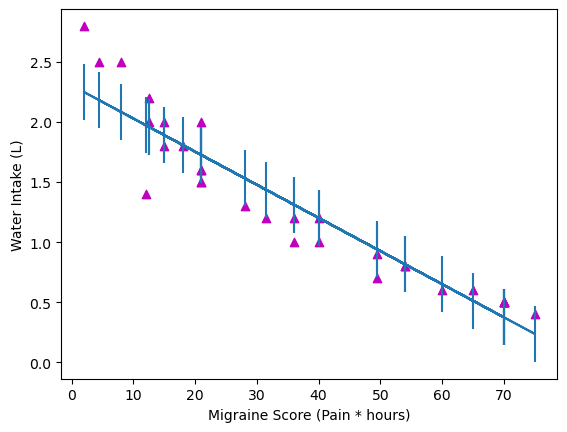

{'m': -0.027586964822903758, 'b': 2.3049846792895656}


In [5]:
#Figure 3
plt.scatter(migraine_score, water, color="m", marker="^")
plt.errorbar(migraine_score,slope(migraine_score,water)["m"]*migraine_score
         +slope(migraine_score,water)["b"], yerr=error_bars(migraine_score,water))
#plt.title("Impact of Exercise on Migraines")
plt.xlabel("Migraine Score (Pain * hours)")
plt.ylabel("Water Intake (L)")
plt.savefig("Fig 3.png")
plt.show()
print(slope(migraine_score,water))

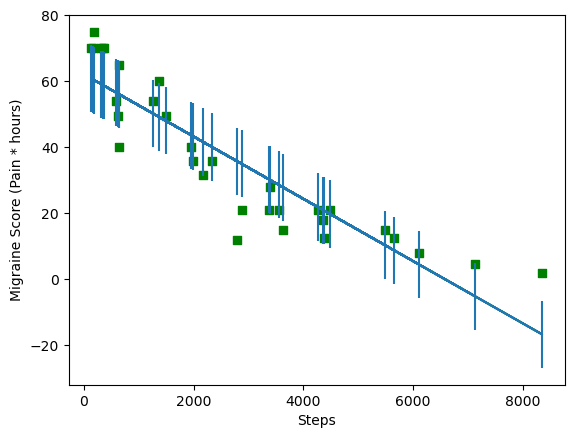

{'m': -0.009437229367310567, 'b': 62.139423512498084}


<Figure size 640x480 with 0 Axes>

In [10]:
plt.scatter(steps, migraine_score, color="g", marker="s")
plt.plot(steps,slope(steps,migraine_score)["m"]*steps
         +slope(steps,migraine_score)["b"], "g-")
plt.errorbar(steps,slope(steps,migraine_score)["m"]*steps
         +slope(steps,migraine_score)["b"], yerr=error_bars(steps,migraine_score))
#plt.title("Impact of Exercise on Migraines")
plt.ylabel("Migraine Score (Pain * hours)")
plt.xlabel("Steps")
plt.show()
plt.savefig("Fig 2.png")
print(slope(steps,migraine_score))